# CP213: Tutorial Notebook Week 1



## Question 1

Consider the gas-water shift reaction
\begin{align*}
{\rm 
CO(g) + H_2O(g) \leftrightarrows CO_2(g) + H_2(g)
}
\end{align*}

| gas       | $M_w$        | $H_f$         | $G_f$         |
| :--       | --:        | --:           | --:           |
|           | g mol$^{-1}$ | kJ mol$^{-1}$ | kJ mol$^{-1}$ |
| CO(g)     | $28.01$    | $ -110.5$     | $ -137.2$     |
| CO$_2$(g) | $44.01$    | $ -393.3$     | $ -394.6$     |
| H$_2$(g)  | $ 2.02$    | $    0.0$     | $    0.0$     |
| H$_2$O(g) | $18.02$    | $ -241.8$     | $ -228.4$     |
|           |            |               |               |










The data in the table have been summarized in the dictionary `data`.  The stoichiometric coefficients (the stoichiometric coefficient for species $k$ is typically denoted by the symbol $\nu_k$) of the reaction are held in the dictionary `nu`.  Note that product species have a positive stoichiometric coefficient, and reactant species have a negative stoichiometric coefficient.

In [1]:
R = 8.314e-3  # ideal gas constant / kJ mol^{-1} K^{-1}
T0 = 298.15   # reference temperature / K
p0 = 1.0e5    # reference pressure / Pa


data = {}
data['CO']  = {'Mw':28.01, 'Hf':-110.5, 'Gf':-137.2 }
data['CO2'] = {'Mw':44.01, 'Hf':-393.3, 'Gf':-394.6 }
data['H2']  = {'Mw': 2.02, 'Hf':   0.0, 'Gf':   0.0 }
data['H2O'] = {'Mw':18.02, 'Hf':-241.8, 'Gf':-228.4 }

nu = {}
nu['CO']  = -1.0
nu['CO2'] =  1.0 
nu['H2']  =  1.0
nu['H2O'] = -1.0

### Part 1: Standard reaction enthalpy and Gibbs energy

The standard enthalpy of reaction $\Delta H_{\rm rxn}$ is defined by
\begin{align*}
\Delta H_{\rm rxn}
&= \sum_k \nu_k H_{f,k}
\end{align*}
where $H_{f,k}$ is the standard enthalpy of formation of species $k$.  The standard Gibbs energy of reaction $\Delta G_{\rm rxn}$ is given by
\begin{align*}
\Delta G_{\rm rxn}
&= \sum_k \nu_k G_{f,k}
\end{align*}
where $G_{f,k}$ is the standard enthalpy of formation of species $k$.

**Task:** Calculate the standard enthalpy of reaction and the standard Gibbs energy of reaction.

In [2]:
Hrxn = 0.0
Grxn = 0.0
for gas, coeff in nu.items():
    Hrxn += coeff*data[gas]['Hf']
    Grxn += coeff*data[gas]['Gf']
    
print(f'standard enthalpy of reaction: {Hrxn} J mol^{{-1}}')    
print(f'standard Gibbs energy of reaction: {Grxn} J mol^{{-1}}')

standard enthalpy of reaction: -41.0 J mol^{-1}
standard Gibbs energy of reaction: -29.00000000000003 J mol^{-1}


### Part 2: Conversion between mole numbers and mole fractions

The mole fraction of species $k$, denoted by $x_k$, in a system is given by
\begin{align*}
x_k = \frac{N_k}{N}
\end{align*}
where $N_k$ is the number of moles of species $k$, and $N=\sum_j N_j$ is the total moles in the system.

**Task:** Create a function that will take a dictionary with the mole numbers as an input and return a dictionary of mole fractions.

In [3]:
mole0 = {}
mole0['CO']  = 1.0
mole0['CO2'] = 1.0 
mole0['H2']  = 1.0
mole0['H2O'] = 1.0



def get_x(mole):
    N = sum(mole.values())
    x_dict = {}
    for name, xx in mole.items():
        x_dict[name] = xx/N
    return x_dict


x_dict = get_x(mole0)
for name, x in x_dict.items():
    print(f'{name}: mole fraction = {x}')


CO: mole fraction = 0.25
CO2: mole fraction = 0.25
H2: mole fraction = 0.25
H2O: mole fraction = 0.25


### Part 3: Extent of reaction

The degree by which a reaction proceeds forward or backward is quantified by the extent of reaction $\alpha$.  Consider a system initially has $N_k^{(0)}$ moles of species $k$. 
For a given value of the extent of reaction, the number of moles $N_k$ of species $k$ in the system is given by the relation
\begin{align*}
N_k &= N_k^{(0)} + \nu_k \alpha .
\end{align*}
and $\nu_k$ is the stoichiometric coeffcient for species $k$ in the reaction.

**Task:** Create a function that takes the reaction extent, a dictionary with the initial mole numbers, and a dictionary with the stoichiometric coefficients as input and returns a dictionary with the moles of each component in the system.

In [4]:
def get_moles (alpha, mole0, nu):
    
    moles = {}
    for molecule, coeff in nu.items():
        moles[molecule] = mole0[molecule] + alpha*coeff
    return moles

alpha = 0.1
mole = get_moles(alpha, mole0, nu)
for name, N in mole.items():
    print(f'{name}: moles = {N}')





CO: moles = 0.9
CO2: moles = 1.1
H2: moles = 1.1
H2O: moles = 0.9


**Task:**
Create a function that takes a dictionary with the initial moles of each species in the system and a dictionary with the stoichiometric coefficients as input and returns the minimum and maximum allowed values of the extent of reaction.


Physically, the moles of each of the species in the system must remain non-negative.  The maximum value of the extent of reaction is dictated by the reactant species.

\begin{align*}
N_k &= N_k^{(0)} + \nu_k \alpha
\\
\alpha &= \frac{N_k-N_k^{(0)}}{\nu_k}
\end{align*}

In [5]:
def get_extent_bounds(mole0, nu):
    min_list = []
    max_list = []
    for molecule, coeff in nu.items():
        N0 = mole0[molecule]
        if (coeff < 0.0):
            max_list.append(-N0/coeff)
        if (coeff > 0.0):
            min_list.append(-N0/coeff)
    alpha_max = min(max_list)
    alpha_min = max(min_list) 
    
    slop = 1.0e-6
    alpha_max -= slop
    alpha_min += slop

    return alpha_min, alpha_max



mole0 = {}
mole0['CO']  = 1.0
mole0['CO2'] = 1.0 
mole0['H2']  = 0.5
mole0['H2O'] = 0.5

alpha_min, alpha_max = get_extent_bounds(mole0, nu)
print(f'{alpha_min} < alpha < {alpha_max}')

-0.499999 < alpha < 0.499999


**Task:** Plot the mole fraction of each component as a function of the extent of reaction over its range of allowed values.

{'CO': 0.16666666666666666, 'CO2': 0.5, 'H2': 0.3333333333333333, 'H2O': 0.0}


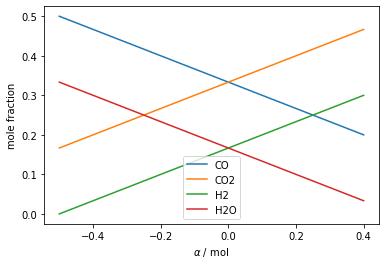

In [6]:
import numpy as np
import pylab as plt

alpha_min, alpha_max = get_extent_bounds(mole0, nu)
alpha_data = np.arange(alpha_min, alpha_max, 0.1)

alpha = 0.5
mole = get_moles(alpha, mole0, nu)
x_dict = get_x(mole)
print(x_dict)

x_data = {name:[]  for name in mole0.keys()}
for alpha in alpha_data:
    mole = get_moles(alpha, mole0, nu)
    x_dict = get_x(mole)
    for name, x in x_dict.items():
        x_data[name].append(x)
    
for name in x_data.keys():
    plt.plot(alpha_data, x_data[name], label=name)
#plt.plot(alpha_data, x_data['CO2'])
#plt.plot(alpha_data, x_data['H2'])
plt.ylabel('mole fraction')
plt.xlabel(r'$\alpha$ / mol')
plt.legend()
plt.show()

## Part 4: Heat capacity

The heat capacity of the gases can be described by the equation
\begin{align*}
\frac{C_p}{R}
&= a_0 + a_1 T + a_2 T^2 + a_3 T^3 + a_4 T^4
\end{align*}
where $T$ is the absolute temperature in kelvin,
$R=8.314$\,J$^{-1}$\,mol\,K$^{-1}$ is the ideal gas constant, and the
coefficients $a_k$ are given in the table below.


| gas       | $a_0$   | $a_1\times10^3$ | $a_2\times10^5$ | $a_3\times10^8$ | $a_4\times10^{11}$ |
| :--       | --:     | --:             | --:             | --:             | --:                |
|           |         | K$^{-1}$        | K$^{-2}$        | K$^{-3}$        |  K$^{-4}$                   |
| CO(g)     | $3.912$ | $ -3.913$| $1.182$  | $ -1.302$       | $  0.515$          |
| CO$_2$(g) | $3.259$ | $  1.356$| $1.502$  | $ -2.374$       | $  1.056$          |
| H$_2$(g)  | $2.883$ | $  3.681$| $-0.772$ | $  0.692$       | $ -0.213$          |
| H$_2$O(g) | $4.395$ | $ -4.186$| $1.405$ | $ -1.564$       | $  0.632$          |


The coefficients of the heat capacity have been added to the dictionary `data` (see below).  In what follows below, assume that the mixtures behave as an ideal gas.



In [7]:
data['CO'] ['Cp_coeff'] = [3.912, -3.913e-3,  1.182e-5, -1.302e-8,  0.515e-11]      
data['CO2']['Cp_coeff'] = [3.259,  1.356e-3,  1.502e-5, -2.374e-8,  1.056e-11]      
data['H2'] ['Cp_coeff'] = [2.883,  3.681e-3, -0.772e-5,  0.692e-8, -0.213e-11]      
data['H2O']['Cp_coeff'] = [4.395, -4.186e-3,  1.405e-5, -1.564e-8,  0.632e-11]

R = 8.314  # J mol^{-1} K^{-1}

**Task:** Create a function that takes a temperature and a dictionary of the mole numbers of each species in the system as input and returns the heat capacity of the mixture.




In [8]:
def get_Cp(T, moles):

    Cp = 0.0
    for name, N in moles.items():
        Cp_name = 0.0
        for k, aa in enumerate(data[name]['Cp_coeff']):
            Cp_name += aa*T**k
        Cp_name *= N
        Cp += Cp_name
    
    return Cp


moles = {'CO':1, 'CO2':2, 'H2':0.1, 'H2O':1}
T = 900.0

Cp = get_Cp(T, moles)

print(f'heat capacity = {Cp} J K^{{-1}}')

heat capacity = 21.499027700000003 J K^{-1}


**Task:**
Plot the molar heat capacity of the mixture and of each of the individual components as a function of temperature.

In [ ]:
moles = {'CO':1, 'CO2':2, 'H2':0, 'H2O':1}
T_data = np.arange(200.0, 600.0, 10.0)

x_dict = get_x(moles)
Cp_data = [get_Cp(T, x_dict) for T in T_data]
plt.plot(T_data, Cp_data, color='black', lw=5)


species_list = ['CO', 'CO2', 'H2', 'H2O']
mole0 = {name:0.0 for name in species_list}

mole = mole0

for name in species_list:
    mole = {name:0.0 for name in species_list}
    mole[name] = 1.0
    print(mole)
    Cp_data = [get_Cp(T, mole) for T in T_data]
    plt.plot(T_data, Cp_data, label=name, ls='dashed')

plt.legend()
plt.xlabel('temperature / K')
plt.ylabel(r'molar heat capacity / J mol$^{-1}$ K$^{-1}$')
plt.show()

**Task:**
Plot the heat capacity of reaction $\Delta C_{p,{\rm rxn}}(T)$ of the gas-water shift reaction as a function of temperature.

Note that the heat capacity of reaction is defined as
\begin{align*}
\Delta C_{p,{\rm rxn}}
&= \sum_k \nu_k C_{p,k}(T)
\end{align*}
where $T$ is the absolute temperature of the system, and $C_{p,k}(T)$ is the molar heat capacity of species $k$ at temperature $T$.

In [ ]:
T_data = np.arange(200.0, 600.0, 10.0)

Cp_data = [get_Cp(T, nu) for T in T_data]
plt.plot(T_data, Cp_data, color='black', lw=2)

plt.xlabel('temperature / K')
plt.ylabel(r'$\Delta C_{p,{\rm rxn}}$ / J mol$^{-1}$ K$^{-1}$')
plt.show()

In [ ]:
def get_enthalpy(alpha, mole0, nu):
    for molecule, coeff in nu.items():
        data[molecule]['Hf']

## Part 3: Chemical reaction equilibrium

The condition for equilibirum is
\begin{align*}
\Pi_k \left(\frac{p_k}{p_0}\right)^{\nu_k} 
&= K(T)
\end{align*}
where $p_k$ is the partial pressure of species $k$, $p_0$ is a reference pressure, typically taken to be $1\,{\rm bar}$, and $K(T)$ is the equilibrium constant, given by $\ln K(T) = -\Delta G_{\rm rxn}(T)/(RT)$.

\begin{align*}
\Pi_k \left( x_k \frac{p_k}{p_0}\right)^{\nu_k} 
&= K(T)
\end{align*}

Taking the log of both sides of the equation, 
\begin{align*}
\sum_k {\nu_k}\ln x_k
+ \nu\ln\left(\frac{p}{p_0}\right)
&= \ln K(T)
\end{align*}
where $\nu=\sum_k \nu_k$

To solve the equation using Python, we need to put it in a form $f(x)=0$:
\begin{align*}
\sum_k {\nu_k}\ln x_k
+ \nu\ln\left(\frac{p}{p_0}\right)
- \ln K(T)
&= 0
\end{align*}

**Task:**
Use the function `bisect` from scipy.optimize to solve for the conversion $\alpha$, given the initial moles in the system.  This has the advantage of giving bounds to the value of the solution.

In [ ]:
import numpy as np

def get_lnK0():
    return -Grxn/(R*T0)

In [ ]:
#lnK = -Grxn/(R*Tf)
lnK = get_lnK0()
print(lnK)

p = 1.0e5

def residual(alpha, mole0, p, lnK):

    mole = {gas: N0 + nu[gas]* alpha for gas, N0 in mole0.items()}
    x_dict = get_x(mole)
    nu_sum = sum(nu.values())
    
    ln_prod = 0.0
    for gas, coeff in nu.items():
        ln_prod += coeff*np.log(x_dict[gas])

    return ln_prod - lnK + nu_sum*np.log(p/p0)

print(residual(0.99999999, mole0, p0, lnK))

import pylab as plt
alpha_data = np.arange(0.001, 1.0, 0.001)
y_data = [residual(alpha, mole0, p, lnK) for alpha in alpha_data]
plt.plot(alpha_data, y_data)
plt.show()


from scipy.optimize import fsolve
from scipy.optimize import bisect



alpha_min, alpha_max = get_extent_bounds(mole0, nu)
sol = bisect(residual, alpha_min, alpha_max, args=(mole0, p, lnK))
print(sol)
alpha = sol
mole = {gas: N0 + nu[gas]* alpha for gas, N0 in mole0.items()}
print(mole)

## part 5

The enthalpy can be determined from the heat capacity:
\begin{align*}
H(T) &= H_f + \int_{T_f}^{T} dT' C_p(T')
\end{align*}

The Gibbs energy can be determined from the enthalpy:
\begin{align*}
\frac{G(T)}{RT}
%&= \frac{G_f}{RT_f}
%+ \int_{T_f}^{T} d\frac{1}{RT'} H(T')
%\\
&= \frac{G_f}{RT_f}
- \int_{T_f}^{T} dT'\, \frac{H(T')}{RT'^2} 
\end{align*}
where $T_f=298.15\,{\rm K}$.

Create a function that will return the logarithm of the equilibrium constant given a temperature.

In [ ]:

arxn = [0.0, 0.0, 0.0, 0.0, 0.0]
for name, coeff in nu.items():
    for k, a in enumerate(data[name]['Cp_coeff']):
        arxn[k] += coeff*a
print(arxn)


In [ ]:
def get_lnK(T):
    
    x = T/T0
    arg = 1.0/x - 1.0
    lnK = Grxn/(R*T0) + Hrxn/(R*T0)*arg
    lnK -= arxn[0] * (np.log(x)+arg)
    lnK -= arxn[1]/2.0 * (x-1.0+arg)
    lnK -= arxn[2]/3.0 * ((x**2-1.0)/2.0+arg)
    lnK -= arxn[3]/4.0 * ((x**3-1.0)/3.0+arg)
    lnK -= arxn[4]/5.0 * ((x**4-1.0)/4.0+arg)
    
    return -lnK

lnK = get_lnK(298.15)
print(lnK)

## part 6

**Task:**
Plot the  reaction extent as a function of temperature

In [ ]:
T_data = np.arange(300.0, 400.0, 10.0)

from scipy.optimize import fsolve
from scipy.optimize import bisect

alpha_data = []
for T in T_data:
    lnK= get_lnK(T)
    alpha_min, alpha_max = get_extent_bounds(mole0, nu)
    sol = bisect(residual, alpha_min, alpha_max, args=(mole0,p,lnK))
#    print(T,sol)
    alpha = sol
    alpha_data.append(alpha)
    mole = {gas: N0 + nu[gas]* alpha for gas, N0 in mole0.items()}
#    print(mole)

plt.plot(T_data, alpha_data)

plt.xlabel('temperature / K')
plt.ylabel(r'$\alpha$ / mol')
plt.show()

**Task:** Plot the variation of the mole fractions of the component as a function of temperature

In [ ]:
T_data = np.arange(300.0, 500.0, 10.0)

x_data = {name:[] for name in mole0.keys()}

for T in T_data:
    lnK= get_lnK(T)
    alpha_min, alpha_max = get_extent_bounds(mole0, nu)
    sol = bisect(residual, alpha_min, alpha_max, args=(mole0,p,lnK))
    alpha = sol
    mole = get_moles(alpha, mole0, nu)
    x_dict = get_x(mole)
    for name, x in x_dict.items():
        x_data[name].append(x)
#    print(T,alpha, x_dict)
#    alpha = sol
#    mole = {gas: N0 + nu[gas]* alpha for gas, N0 in mole0.items()}
#    print(mole)

for name in mole0.keys():
    plt.plot(T_data, x_data[name], label=name)

plt.xlabel('temperature / K')
plt.ylabel('mole fraction')
plt.legend()
plt.show()